In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('SeoulBikeData.csv')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.shape

(8760, 14)

In [5]:
df.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [7]:
df.Date.value_counts().unique()

array([24])

In [8]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [9]:
import matplotlib.pyplot as plt

In [10]:
seasonal_rentals = df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()

print(seasonal_rentals)

  Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169


In [11]:
functioning_day_rentals=df.groupby('Functioning Day')['Rented Bike Count'].sum().reset_index()
print(functioning_day_rentals)

  Functioning Day  Rented Bike Count
0              No                  0
1             Yes            6172314


In [12]:
holiday_rentals=df.groupby('Holiday')['Rented Bike Count'].sum().reset_index()
print(holiday_rentals)

      Holiday  Rented Bike Count
0     Holiday             215895
1  No Holiday            5956419


In [13]:
df['Date']=pd.to_datetime(df['Date'])

/var/folders/yk/mbbrtc1n325dk_tvlpy42nyh0000gn/T/ipykernel_1069/3023999556.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [15]:
df['year']=df['Date'].dt.year

In [16]:
df['month']=df['Date'].dt.month_name()

In [17]:
df['day']=df['Date'].dt.day_name()

In [18]:
df=df.drop('Date',axis=1)

In [19]:
df['Seasons'].replace({'Autumn':1,'Spring':2,'Summer':3,'Winter':4},inplace=True)
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,No Holiday,Yes,2017,January,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,No Holiday,Yes,2017,January,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,No Holiday,Yes,2017,January,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,No Holiday,Yes,2017,January,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,No Holiday,Yes,2017,January,Thursday


In [20]:
df['Holiday'].replace({'No Holiday':1,'Holiday':2},inplace=True)
df['Functioning Day'].replace({'Yes':1,'No':2},inplace=True)

In [21]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,1,1,2017,January,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,1,1,2017,January,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,1,1,2017,January,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,1,1,2017,January,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,1,1,2017,January,Thursday


In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [23]:
label_encoder=LabelEncoder()
df['month_encoded']=label_encoder.fit_transform(df['month'])

In [24]:
df=df.drop('month_encoded',axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
 10  Seasons                   8760 non-null   int64  
 11  Holiday                   8760 non-null   int64  
 12  Functioning Day           8760 non-null   int64  
 13  year                      8760 non-null   int64  
 14  month   

/var/folders/yk/mbbrtc1n325dk_tvlpy42nyh0000gn/T/ipykernel_1069/2705482191.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

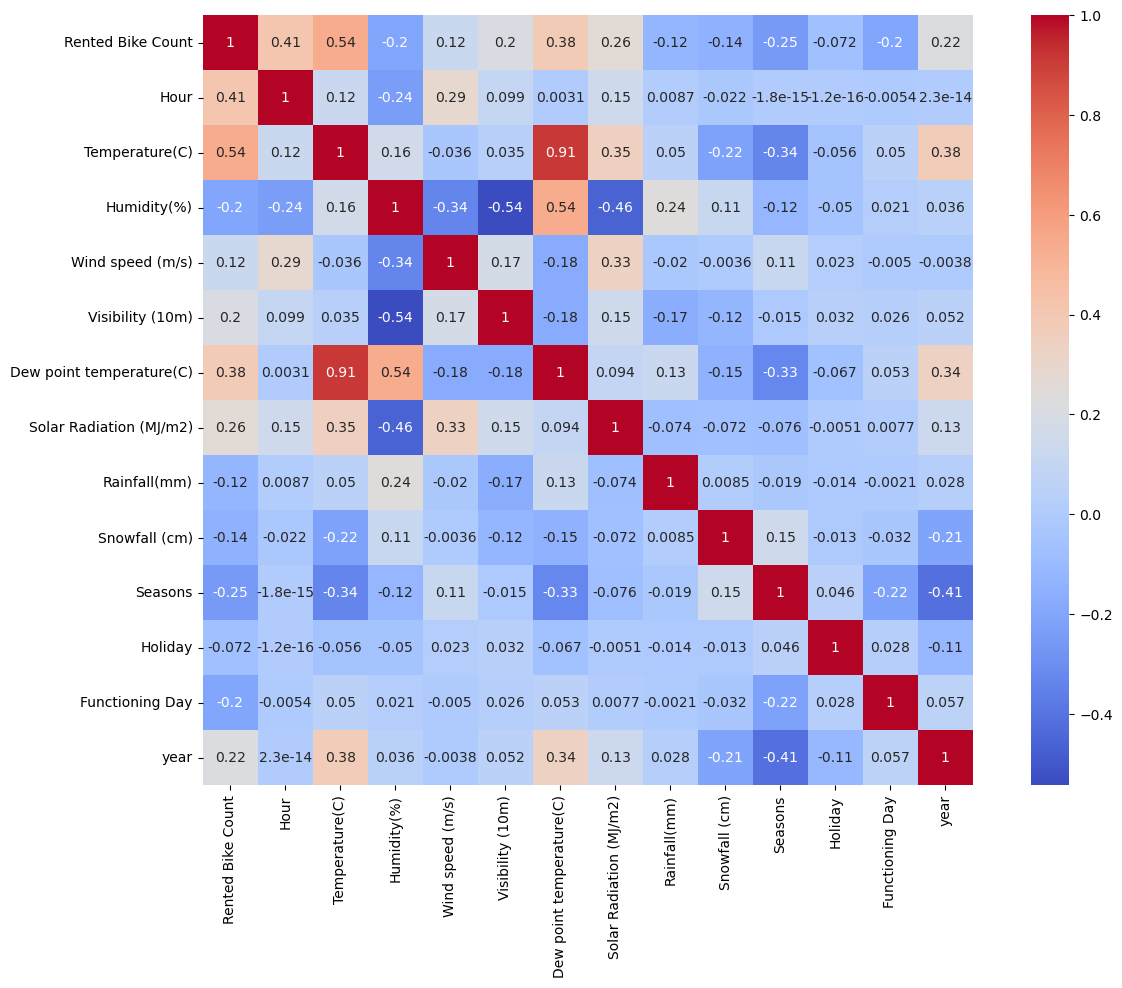

In [26]:
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, square=True,cmap='coolwarm')
plt.show

In [27]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,1,1,2017,January,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,1,1,2017,January,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,1,1,2017,January,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,1,1,2017,January,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,1,1,2017,January,Thursday


In [52]:
df.Hour.value_counts()

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

In [42]:
workingday=df[df['Functioning Day']==1]
Holiday=df[df['Holiday']==1]
Weekend = df[(df['day'] == 'Saturday') | (df['day'] == 'Sunday')]


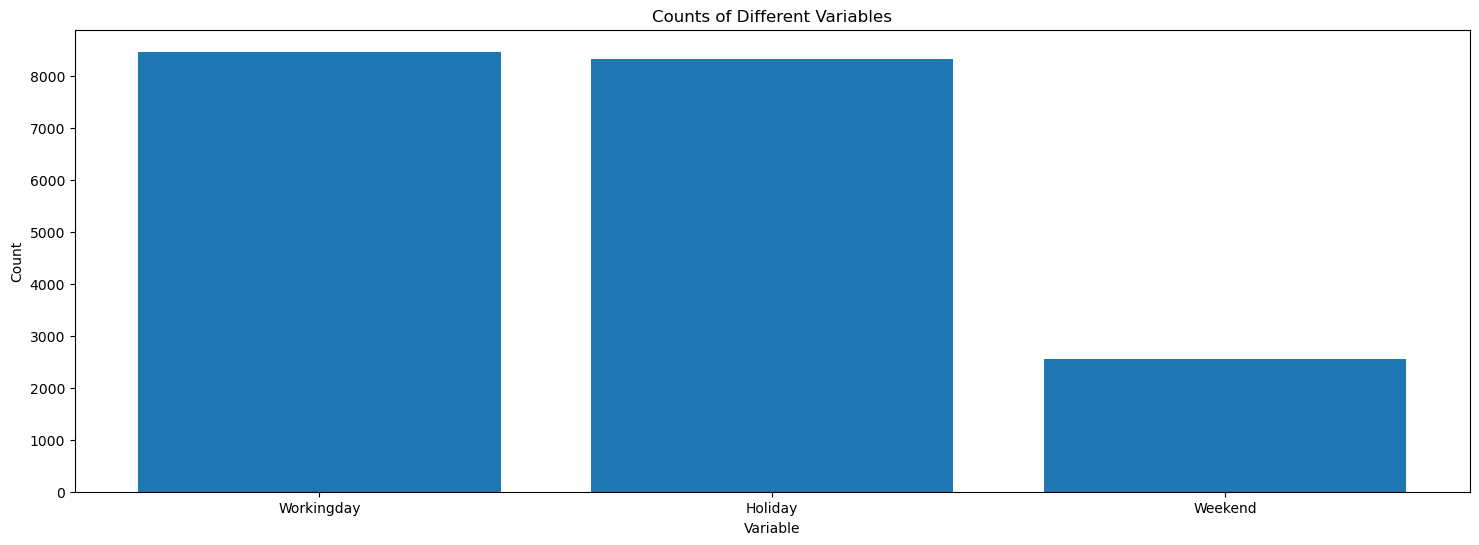

In [44]:
counts = [workingday.shape[0], Holiday.shape[0], Weekend.shape[0]]
labels = ['Workingday', 'Holiday', 'Weekend']

plt.figure(figsize=(18, 6))
plt.bar(labels, counts)
plt.xlabel('Variable')
plt.ylabel('Count')
plt.title('Counts of Different Variables')
plt.show()

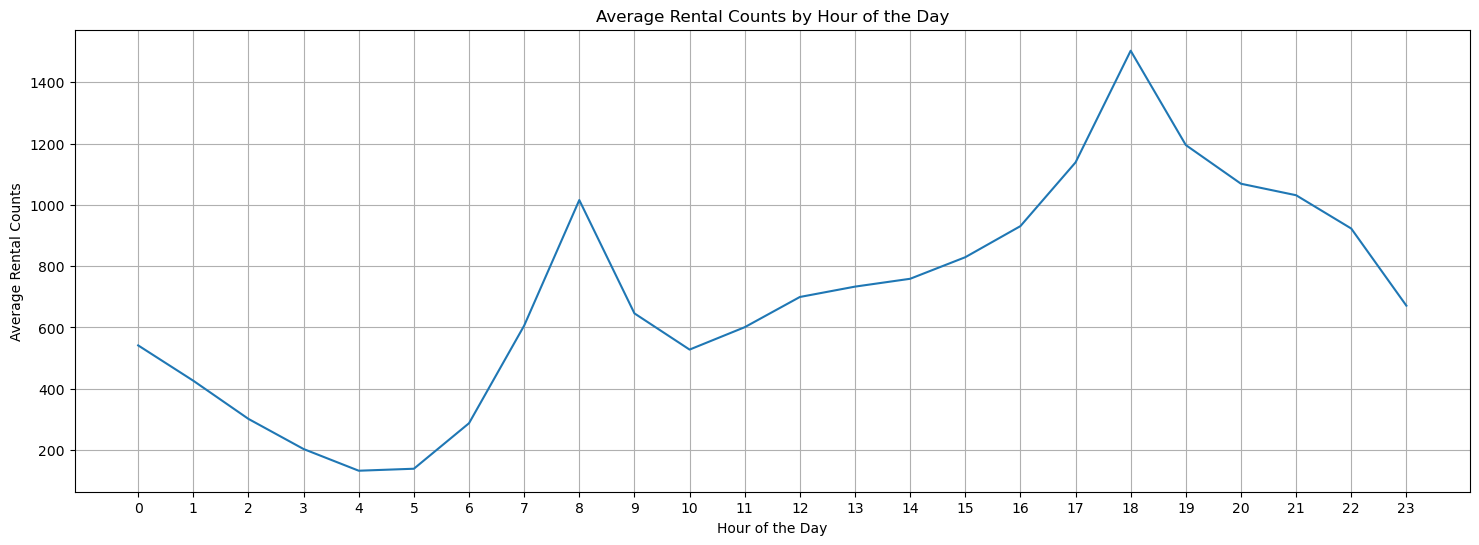

In [55]:
hourly_counts = df.groupby('Hour')['Rented Bike Count'].mean().reset_index()

# Create a line plot to visualize the average rental counts by hour
plt.figure(figsize=(18, 6))
sns.lineplot(x='Hour', y='Rented Bike Count', data=hourly_counts)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rental Counts')
plt.title('Average Rental Counts by Hour of the Day')
plt.xticks(ticks=range(24), labels=range(24))
plt.grid()
plt.show()

Text(0, 0.5, 'Mean Count')

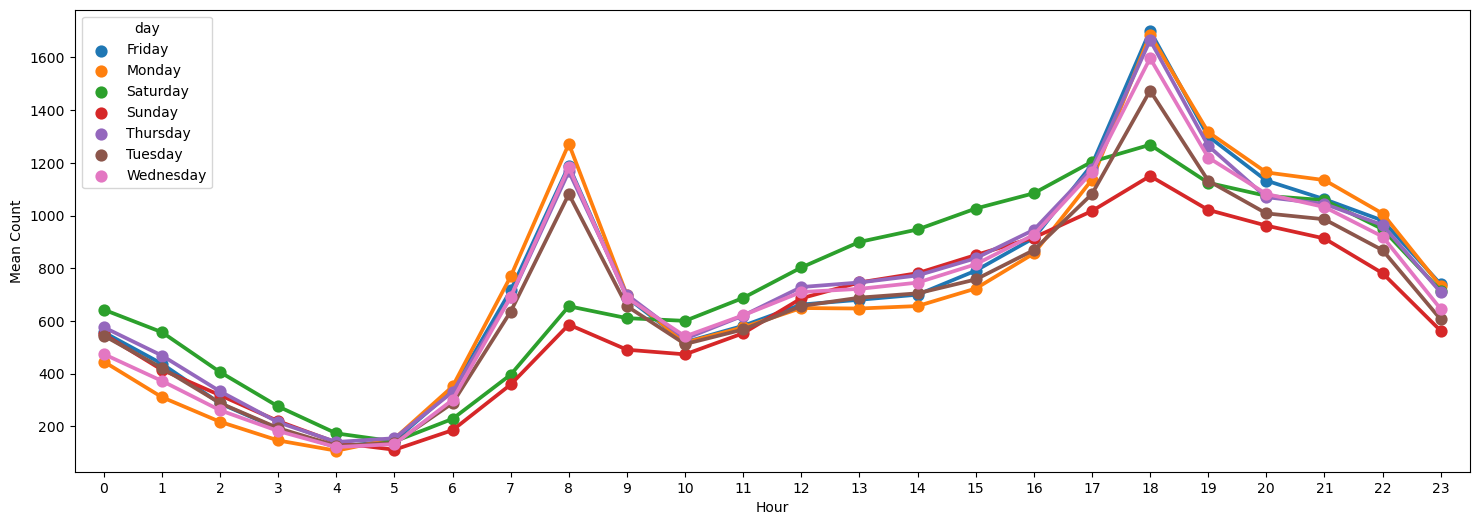

In [58]:
plt.figure(figsize=(18, 6))
hour_day_df = df.groupby(["Hour", "day"])["Rented Bike Count"].mean().to_frame().reset_index()
ax1 = sns.pointplot(x=hour_day_df["Hour"], y=hour_day_df["Rented Bike Count"], hue=hour_day_df["day"])
ax1.set_ylabel("Mean Count")

In [60]:
Weekend['day'].unique()

array(['Sunday', 'Saturday'], dtype=object)

Text(0, 0.5, 'Mean Count')

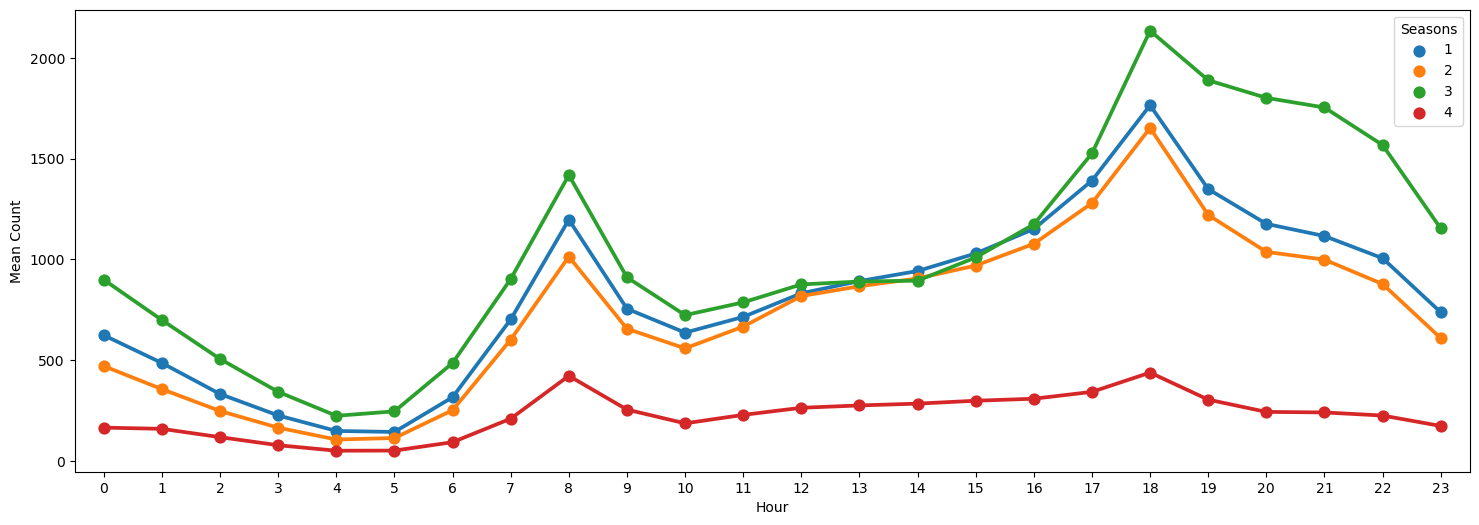

In [61]:
plt.figure(figsize=(18,6))
hour_season_df=df.groupby(['Hour','Seasons'])['Rented Bike Count'].mean().to_frame().reset_index()
ax2=sns.pointplot(x=hour_season_df['Hour'],y=hour_season_df['Rented Bike Count'],hue=hour_season_df['Seasons'])
ax2.set_ylabel('Mean Count')

In [62]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,1,1,2017,January,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,1,1,2017,January,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,1,1,2017,January,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,1,1,2017,January,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,1,1,2017,January,Thursday


In [64]:
df.year.value_counts()

2018    8016
2017     744
Name: year, dtype: int64

/var/folders/yk/mbbrtc1n325dk_tvlpy42nyh0000gn/T/ipykernel_1069/1341478908.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

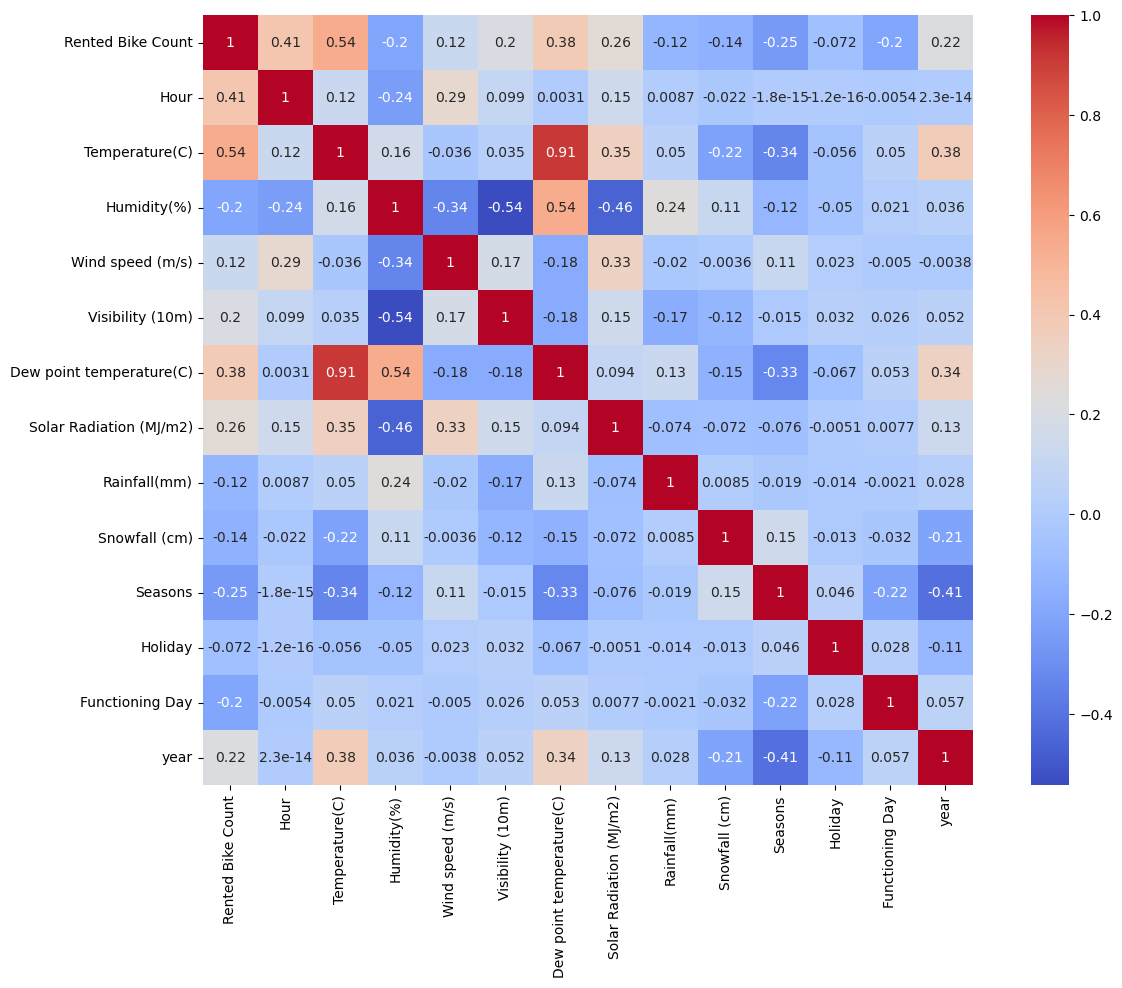

In [63]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, square=True,cmap='coolwarm')
plt.show

In [66]:
df=df.drop(['Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','year'],axis=1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Visibility (10m)          8760 non-null   int64  
 5   Dew point temperature(C)  8760 non-null   float64
 6   Seasons                   8760 non-null   int64  
 7   Holiday                   8760 non-null   int64  
 8   Functioning Day           8760 non-null   int64  
 9   month                     8760 non-null   object 
 10  day                       8760 non-null   object 
dtypes: float64(2), int64(7), object(2)
memory usage: 752.9+ KB


In [68]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in ['month','day']:
    df[i]=labelencoder.fit_transform(df[i])

In [69]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Visibility (10m),Dew point temperature(C),Seasons,Holiday,Functioning Day,month,day
0,254,0,-5.2,37,2000,-17.6,4,1,1,4,4
1,204,1,-5.5,38,2000,-17.6,4,1,1,4,4
2,173,2,-6.0,39,2000,-17.7,4,1,1,4,4
3,107,3,-6.2,40,2000,-17.6,4,1,1,4,4
4,78,4,-6.0,36,2000,-18.6,4,1,1,4,4


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Visibility (10m)          8760 non-null   int64  
 5   Dew point temperature(C)  8760 non-null   float64
 6   Seasons                   8760 non-null   int64  
 7   Holiday                   8760 non-null   int64  
 8   Functioning Day           8760 non-null   int64  
 9   month                     8760 non-null   int64  
 10  day                       8760 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 752.9 KB


<function matplotlib.pyplot.show(close=None, block=None)>

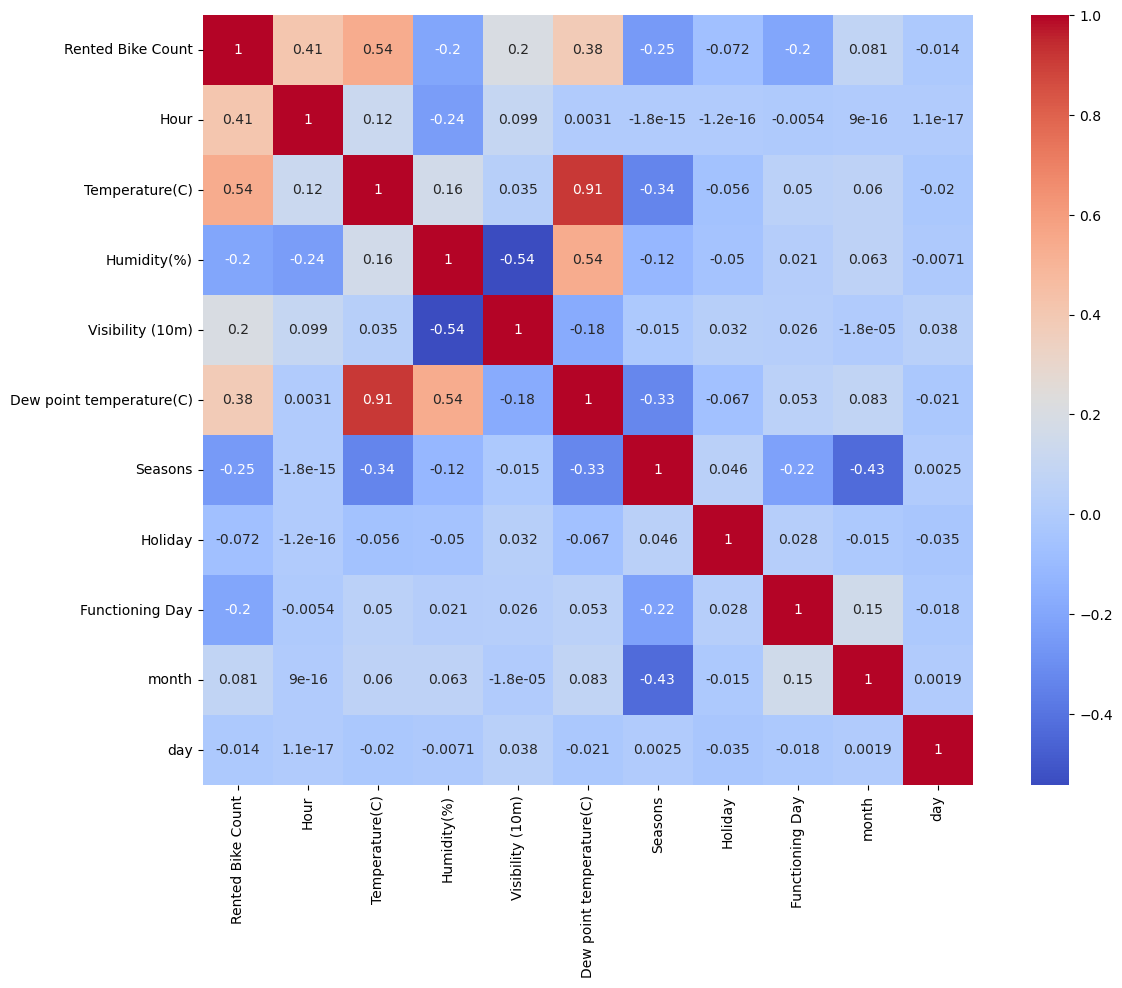

In [76]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, square=True,cmap='coolwarm')
plt.show

In [83]:
df3=(df-df.min())/(df.max()-df.min())*9+1

In [84]:
df3.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Visibility (10m),Dew point temperature(C),Seasons,Holiday,Functioning Day,month,day
0,1.642857,1.000000,2.982517,4.397959,10.0,3.024221,10.0,1.0,1.0,4.272727,7.0
1,1.516310,1.391304,2.935315,4.489796,10.0,3.024221,10.0,1.0,1.0,4.272727,7.0
2,1.437852,1.782609,2.856643,4.581633,10.0,3.008651,10.0,1.0,1.0,4.272727,7.0
3,1.270810,2.173913,2.825175,4.673469,10.0,3.024221,10.0,1.0,1.0,4.272727,7.0
4,1.197413,2.565217,2.856643,4.306122,10.0,2.868512,10.0,1.0,1.0,4.272727,7.0


In [89]:
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor

In [90]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_log_error, make_scorer

In [92]:
X=df3.drop(['Rented Bike Count'],axis=1)
Y=df3['Rented Bike Count']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [95]:
from math import sqrt  
from sklearn.metrics import mean_squared_error
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = sqrt(mean_squared_error(Y_test, lr_predictions))
print(f"Linear Regression RMSE: {lr_rmse}")

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)
dt_predictions = dt_model.predict(X_test)
dt_rmse = sqrt(mean_squared_error(Y_test, dt_predictions))
print(f"Decision Tree Regressor RMSE: {dt_rmse}")

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = sqrt(mean_squared_error(Y_test, rf_predictions))
print(f"Random Forest Regressor RMSE: {rf_rmse}")

Linear Regression RMSE: 1.1358411993857533
Decision Tree Regressor RMSE: 0.7847555769735625
Random Forest Regressor RMSE: 0.5751278694898337
